# Observe Datasets
_Load data. Check size, head, tail. Identify trends in missing values._

The GLIMS data package includes GLIMS files for hypsometry, images, lines, points, and polygons. The last four are explored here, with an emphasis on polygons. According to the GLIMS data package README:

- the images file includes information on images linked to the glaciers. (but not the images).
- the lines file includes line features representing glacier snow lines and center lines.
- the points file includes representative points for glaciers.
- the polygons file includes polygon features representing glacier outlines and some other outlines.


In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Check working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Ask pandas to display all columns
pd.set_option('display.max_columns', None)

Current Directory: /Users/yun/Documents/GLIMS/glims_notebooks


In [2]:
# Load Esri shapefiles as geopandas dataframes
images = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_images.shp") 
lines = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_lines.shp")
points = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_points.shp")
polygons = gpd.read_file("GLIMS_20230716/glims_download_13173/glims_polygons.shp")

In [3]:
# Check their size
print(
    "images", images.shape,
    "\nlines", lines.shape,
    "\npoints", points.shape,
    "\npolygons", polygons.shape
)

images (1772, 5) 
lines (2832, 9) 
points (328116, 2) 
polygons (565887, 31)


Exploration will revolve around the polygons data since it has the most data (more rows and columns).

In [4]:
# Initial look at data
images.sample(5)

,inst_sname,orig_id,acq_time,est_loc,geometry
384,TM4,LT51380352002239BJC00,2002-08-27 00:00:00,0,POINT Z (0.00000 0.00000 0.00000)
1166,Landsat7,L5134033_03320070813,2007-08-13 00:00:00,0,POINT Z (88.71572 38.13177 0.00000)
269,Landsat7,LE71430302001167SGS00,2001-06-16 00:00:00,0,POINT Z (0.00000 0.00000 0.00000)
1079,Landsat7,LE72310962010088EDC00,2010-03-29 00:00:00,0,POINT Z (-73.87405 -51.69810 0.00000)
1029,Landsat7,LE72320932000068SGS00,2009-07-07 00:00:00,0,POINT Z (-72.50000 -48.00000 0.00000)


In [5]:
# Initial look at data
lines.sample(5)

,line_type,anlys_id,glac_id,anlys_time,src_date,rec_status,subm_id,release_dt,geometry
1362,centerline,103157.0,G016716E77776N,2010-01-01T00:00:00,2008-09-01T00:00:00,okay,563.0,2012-12-04T00:00:00,"LINESTRING Z (16.68883 77.77035 0.00000, 16.69..."
2209,centerline,103201.0,G016127E77633N,2010-01-01T00:00:00,2008-09-01T00:00:00,okay,563.0,2012-12-04T00:00:00,"LINESTRING Z (16.02863 77.58653 0.00000, 16.03..."
2473,centerline,103627.0,G014928E78701N,2010-01-01T00:00:00,2007-09-01T00:00:00,okay,563.0,2012-12-04T00:00:00,"LINESTRING Z (14.87746 78.70998 0.00000, 14.88..."
2192,centerline,104371.0,G015302E79008N,2010-01-01T00:00:00,2010-07-15T00:00:00,okay,563.0,2012-12-04T00:00:00,"LINESTRING Z (15.31625 79.01314 0.00000, 15.30..."
2698,centerline,103591.0,G015717E78701N,2010-01-01T00:00:00,2007-09-01T00:00:00,okay,563.0,2012-12-04T00:00:00,"LINESTRING Z (15.68597 78.70552 0.00000, 15.70..."


In [6]:
# Initial look at data
points.sample(5)

,glacier_id,geometry
136697,G083896E43969N,POINT Z (83.89600 43.96900 0.00000)
114857,G079577E36029N,POINT Z (79.57700 36.02900 0.00000)
5628,G007995E46582N,POINT Z (7.99500 46.58200 0.00000)
161592,G091280E28124N,POINT Z (91.28000 28.12400 0.00000)
127717,G081607E34393N,POINT Z (81.60700 34.39300 0.00000)


In [7]:
# Initial look at data
polygons.sample(5)

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,rec_status,glac_name,wgms_id,local_id,glac_stat,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,geometry
386381,glac_bound,526853.0,G306603E70079N,2018-08-01T00:00:00,1.298590,1.291550,0.0,0.0,0.0,1179.0,1576.0,1823.0,2016-08-30T00:00:00,okay,None,None,None,exists,696.0,2018-08-22T09:00:00,Semi-automated glacier classification.; Band r...,561.0,Various (GlobGlacier),University of Zurich-Irchel,50,50,80,80,"Paul, Frank","Paul, Frank; Rastner, Philipp; Schaub, Yvonne","POLYGON Z ((-53.38525 70.08460 0.00000, -53.38..."
274217,glac_bound,340146.0,G008482E46769N,2008-01-01T00:00:00,0.021484,0.016346,0.0,0.0,0.0,2704.0,0.0,3053.0,2008-09-30T00:00:00,okay,None,None,None,exists,596.0,2016-02-01T09:00:00,Glacier outlines were digitized manually in Ar...,571.0,Swiss Alps,University of Fribourg,50,50,80,80,"Fischer, Mauro","Fischer, Mauro","POLYGON Z ((8.48351 46.76837 0.00000, 8.48368 ..."
287429,glac_bound,352228.0,G006438E61398N,2011-09-06T00:00:00,0.000000,0.098334,0.0,0.0,0.0,0.0,0.0,0.0,2006-09-16T00:00:00,okay,None,None,2153,exists,611.0,2012-12-13T13:52:34,TM3/TM5>=2.4_AND_TM1>=35; Totally 12 satellite...,2.0,Norway,Norwegian Water Resources and Energy Directorate,25,25,50,50,"Winsvold, Solveig Havstad","Andreassen, Liss Marie; Winsvold, Solveig Havstad","POLYGON Z ((6.44040 61.39713 0.00000, 6.43986 ..."
152077,glac_bound,165836.0,G008251E46614N,2013-05-28T00:00:00,0.225620,0.225254,0.0,611.0,0.0,2743.0,2865.0,3002.0,2009-09-15T00:00:00,okay,GOLEGG GLETSCHER,None,A54H/05,exists,579.0,2013-06-03T11:00:00,"SwissImage L2 aerial orthophotos, manual digit...",571.0,Swiss Alps,University of Fribourg,10,0,10,10,"Fischer, Mauro","Fischer, Mauro","POLYGON Z ((8.25249 46.61646 0.00000, 8.25258 ..."
415004,glac_bound,617887.0,G083573E31862N,2018-07-01T00:00:00,0.000000,3.792050,0.0,0.0,0.0,0.0,0.0,0.0,1999-07-13T00:00:00,okay,CN5Z331E0041,None,5Z331E0041,exists,698.0,2018-04-04T09:00:00,Semi-automated glacier classification; Semi-au...,36.0,Asia,Nagoya University,50,50,80,80,"Sakai, Akiko","Sakai, Akiko","POLYGON Z ((83.58245 31.85748 0.00000, 83.5824..."


Plot them to see.

Polygons and lines too small to map if their random samples are geographically distant

In [8]:
# Load the world countries data from the Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check crs of all data to be mapped
print(
    world.crs,
    images.crs, 
    lines.crs,
    points.crs,
    polygons.crs
)

epsg:4326 epsg:4326 epsg:4326 epsg:4326 epsg:4326


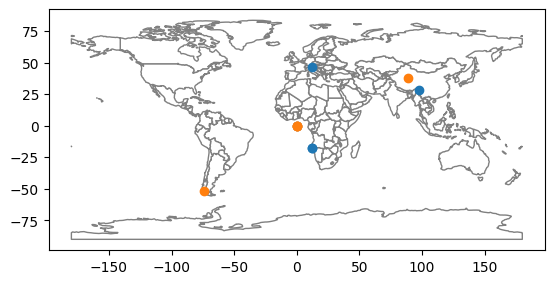

In [9]:
ax = world.plot(color='white', edgecolor='grey');
images.sample(5).plot(ax=ax);
images.sample(5).plot(ax=ax);

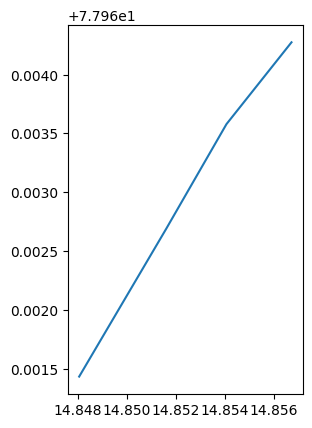

In [10]:
lines.sample(1).plot();

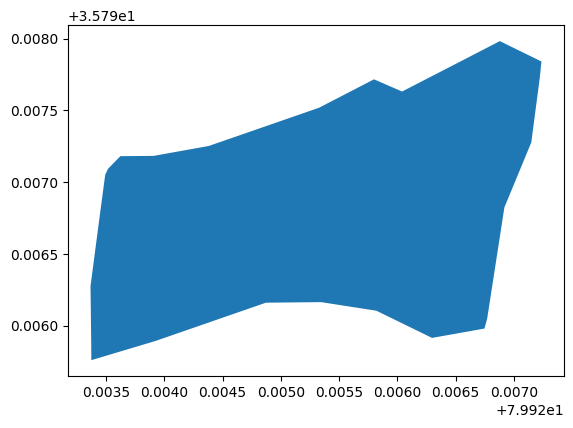

In [11]:
polygons.sample(1).plot();